In [2]:
import pickle
from universal.algos import *
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from universal import tools
from universal import result
from itertools import chain
from PPO_LSTM import PPO
from torch.distributions import Categorical
from env.Portfolio_management import CustomEnv
import seaborn as sns
EPISODES = 1000
lr = 0.001
gamma = 0.98
lmbda = 0.95
epochs = 3
eps_clip = 0.2
MAX_STEPS = 2835

E:\anaconda\envs\protfoilo\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
df = pd.read_csv('./new_data/DAX_close.csv')
#df = df.tail(round(0.5*len(df)))
df.drop(df.head(10).index, inplace=True)
df.drop(df.tail(5).index, inplace=True)
df_original_train = df.head(round(0.8*len(df)))
df_original_test = df.tail(round(0.2*len(df)))

df_ob = pd.read_csv('./new_data/DAX_final(feature).csv')
#df_ob = df_ob.tail(round(0.5*len(df_ob)))
df_ob.drop(df_ob.head(10).index, inplace=True)
df_ob.drop(df_ob.tail(5).index, inplace=True)
df_ob_train = df_ob.head(round(0.8 * len(df_ob)))
df_ob_test = df_ob.tail(round(0.2 * len(df_ob)))
#train_set = (df_ob_train - np.mean(df_ob_train.to_numpy())) / np.std(df_ob_train.to_numpy())
#test_set = (df_ob_test - np.mean(df_ob_train.to_numpy())) / np.std(df_ob_train.to_numpy())

In [4]:
train_set = df_ob_train
test_set =df_ob_test

#model = PPO(1701, 15)
pkl_file = open('model_DAX/3000.pkl', 'rb')
model = pickle.load(pkl_file)
n_epi =0
total_test_reward = []
total_portfolio_wealth = []
stock_weight = []
stock_weight = pd.DataFrame(stock_weight)

In [5]:
env = CustomEnv(df_original_test,test_set)
s = env.reset(0)  # observation
done = False
t = 0
test_reward_list = 1
h_out = (torch.zeros([1, 1, 32], dtype=torch.float), torch.zeros([1, 1, 32], dtype=torch.float))

test_action_list = []
a = 0
done = False
t = 0
my_total_wealth = 1
while (done == False):
    t = t + 1
    h_in = h_out
    s =s.to_numpy()
    prob, h_out = model.pi(torch.from_numpy(s).float(), h_in)
    prob = prob.view(-1)
    np_array= prob.detach().numpy()
   # print(prob)
    count = np_array.shape[0]
    for i in range(count):
         if np_array[i] == np_array.max():
            action = i
            break;
    
    print(action)
    next_s, r, done, _ = env.step(action)    
    #r = r / 20
    
    test_reward_list = test_reward_list * (1+r)
    total_portfolio_wealth.append(test_reward_list)
    #stock_weight = stock_weight.append(result.B)
   
    s = next_s
    if done:
        break


14
0
14
14
14
0
14
14
11
14
11
14
14
11
11
0
14
0
14
0
14
11
0
0
14
11
14
11
0
11
14
0
11
0
14
14
14
0
0
14
14
0
0
14
14
14
0


In [6]:
print(test_reward_list)

4.708523788493533


In [40]:
a

71

In [40]:
stock_weight

,0001.HK,0002.HK,0003.HK,0005.HK,0006.HK,0011.HK,0012.HK,0016.HK,0017.HK,0027.HK,...,2313.HK,2318.HK,2319.HK,2331.HK,2382.HK,2388.HK,2628.HK,2688.HK,3968.HK,3988.HK
0,2.376088e-16,0.000000,1.580321e-16,0.000000,0.000000,2.865109e-16,0.000000,0.000000,1.081743e-16,3.052297e-17,...,8.951173e-16,8.428761e-18,0.000000,1.000000,0.000000,6.372815e-17,0.000000,0.000000,0.000000,0.000000
1,2.376088e-16,0.000000,1.580321e-16,0.000000,0.000000,2.865109e-16,0.000000,0.000000,1.081743e-16,3.052297e-17,...,8.951173e-16,8.428761e-18,0.000000,1.000000,0.000000,6.372815e-17,0.000000,0.000000,0.000000,0.000000
2,2.376088e-16,0.000000,1.580321e-16,0.000000,0.000000,2.865109e-16,0.000000,0.000000,1.081743e-16,3.052297e-17,...,8.951173e-16,8.428761e-18,0.000000,1.000000,0.000000,6.372815e-17,0.000000,0.000000,0.000000,0.000000
3,2.376088e-16,0.000000,1.580321e-16,0.000000,0.000000,2.865109e-16,0.000000,0.000000,1.081743e-16,3.052297e-17,...,8.951173e-16,8.428761e-18,0.000000,1.000000,0.000000,6.372815e-17,0.000000,0.000000,0.000000,0.000000
4,2.376088e-16,0.000000,1.580321e-16,0.000000,0.000000,2.865109e-16,0.000000,0.000000,1.081743e-16,3.052297e-17,...,8.951173e-16,8.428761e-18,0.000000,1.000000,0.000000,6.372815e-17,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2411,1.818182e-02,0.018182,1.818182e-02,0.018182,0.018182,1.818182e-02,0.018182,0.018182,1.818182e-02,1.818182e-02,...,1.818182e-02,1.818182e-02,0.018182,0.018182,0.018182,1.818182e-02,0.018182,0.018182,0.018182,0.018182
2412,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2413,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
2414,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000


In [17]:
sp_data = pd.read_csv('./new_data/SP100_close.csv')
sp_data = sp_data.tail(round(0.5*len(sp_data)))
test_set = sp_data.tail(round(0.4*len(sp_data)))
test_set

,AAPL.O,ABT.N,ACN.N,ADBE.O,AIG.N,AMGN.O,AMT.N,AMZN.O,AVGO.O,AXP.N,...,UNH.N,UNP.N,UPS.N,USB.N,V.N,VZ.N,WBA.O,WFC.N,WMT.N,XOM.N
1946,27264.2465,16903.5893,297.1020,145419.3146,62.8854,14470.2525,306.7739,36622.56,386.1965,2595.9878,...,11600.5809,3683.2957,236.7336,4088.2514,852.1226,2612.1608,10122.3837,2390.3493,54831.0503,3440.9766
1947,30118.5033,16755.4144,298.1631,147221.8143,63.5977,14383.8331,305.4884,37976.16,391.9505,2559.5095,...,11507.4661,3695.0192,238.9092,4080.4980,836.0514,2620.3665,10139.8189,2352.5304,54527.6507,3458.2349
1948,30877.4181,16762.0740,301.3466,148431.2121,63.5977,14541.9747,299.8669,37342.68,397.4941,2565.5435,...,11539.0111,3667.5223,237.9385,4076.0675,837.3248,2609.4255,10231.9764,2355.4395,54485.5119,3472.2059
1949,31083.6219,16637.2075,301.3069,148083.3031,58.8091,14320.3413,304.0625,37665.96,406.3540,2555.9440,...,11572.8365,3702.0532,242.1892,4012.9327,844.3505,2639.9691,10194.6153,2348.6515,55471.5606,3572.4684
1950,31196.2899,17005.1473,303.3629,148941.4785,59.7193,14195.7093,298.3592,38460.36,407.7770,2616.2839,...,11875.7445,3782.8385,242.7917,4082.7132,861.0803,2623.1018,10164.7263,2366.1064,54700.4199,3603.6977
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2427,43893.8541,18625.3240,393.5682,129872.7546,108.8654,15533.1458,313.4200,29073.60,675.4175,4324.1006,...,20698.1983,4819.6506,330.4268,5705.4261,952.8655,2235.8911,10480.0716,4356.1056,57384.2770,8373.2297
2428,43506.4287,18726.6045,387.9767,125664.7130,108.1961,15684.2805,315.4174,27554.40,672.7585,4212.7576,...,20781.0739,4788.8293,319.2080,5630.6203,944.9498,2243.8836,10507.1169,4296.0214,53020.2553,8340.6599
2429,44995.8639,18881.1003,404.7784,130144.4549,109.8485,15720.5028,314.5649,29032.80,694.7411,4263.3681,...,20899.1327,4875.7498,323.3755,5724.4244,935.9668,2243.3841,10607.1847,4377.1350,55024.0541,8521.1896
2430,45156.5736,18944.6152,413.1453,133696.4397,105.6026,15597.4717,327.4992,29347.20,702.4021,4277.7077,...,21168.0877,4961.1181,331.0071,5476.2591,939.8802,2275.3539,10666.6845,4338.0803,56397.5908,8620.7601


In [18]:
wealth = 1
CRP_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = CRP()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        CRP_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0217470595029419
0.984020474143918
0.9773531428341313
1.0721635303863648
0.9434397355628543
1.097192156905051
1.0297407175901825
1.014806447982678
1.0004558871795692
1.0394267554765295
1.004248826365964
1.010726265713259
0.9851535091775316
1.0302423390208397
1.0104170480800685
1.0255594695319967
1.0078577857405997
1.0052950255920845
1.009143850831508
1.0055145764465383
1.0014196091401881
1.011540871916545
1.0009854070525417
1.0081454797692229
1.0026685537396893
1.007930131903369
0.9794291808710077
1.0039473659144622
1.0433932194037387
1.029492612297704
0.9991264804875579
0.9932676415244223
1.0005903836407084
1.0218592755328595
0.9730125445902477
1.0215709599395728
0.945991174062362
1.0005862331781283
1.0361547433742078
0.9958160938850347
0.9746768764085434
0.9323690487516147
1.0162524260655803
0.9870380412782115
0.9725137915828037
0.9916668951338942
-------------------------
1.229077999550748


In [19]:
wealth = 1
DynamicCRP_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = DynamicCRP()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        DynamicCRP_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0217470595029419
0.984020474143918
0.9773531428341313
1.0721635303863648
0.9434397355628543
1.097192156905051
1.0297407175901825
1.014806447982678
1.000455887179569
1.0394267554765295
1.004248826365964
1.010726265713259
0.9851535091775316
1.0302423390208397
1.0104170480800685
1.0255594695319967
1.0078577857405997
1.0052950255920845
1.009143850831508
1.0055145764465383
1.0014196091401881
1.011540871916545
1.0009854070525417
1.0081454797692229
1.0026685537396893
1.007930131903369
0.9794291808710077
1.0039473659144622
1.0433932194037387
1.029492612297704
0.9991264804875579
0.9932676415244223
1.0005903836407084
1.0218592755328595
0.9730125445902477
1.0215709599395728
0.945991174062362
1.0005862331781283
1.0361547433742078
0.9958160938850346
0.9746768764085434
0.9323690487516147
1.0162524260655803
0.9870380412782115
0.9725137915828037
0.9916668951338942
-------------------------
1.2290779995507475


In [20]:
wealth = 1
EG_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = EG()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        EG_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0217815614572558
0.983987072432842
0.9773248140102796
1.072162812649652
0.9434353447159841
1.0970508707374431
1.0297943662534295
1.0147949455652492
1.000451175359043
1.0394506682520663
1.0042549133005332
1.0107013671135612
0.9851800987797272
1.0302124858707014
1.0104112301756218
1.0255684433274745
1.0078434466536035
1.0053096212586234
1.009150806297476
1.005512748269449
1.0014129305808306
1.0115354249232402
1.000975791583912
1.0081445649190417
1.0026715414123648
1.0079279093705777
0.9794309764053512
1.0039783858400348
1.0434039251864453
1.0294947256641909
0.999124773273327
0.9932371898762754
1.0005717975777342
1.021856671406488
0.9730235887498632
1.0215466987552955
0.945996923499202
1.000589626588591
1.0361270512039837
0.9958545743218737
0.9746843055537879
0.9323802333585154
1.0162438283231374
0.9870330069196867
0.9725235683932233
0.9916395094207493
-------------------------
1.2288946715037523


In [21]:
wealth = 1
CWMR_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = CWMR()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        CWMR_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0261697775712793
0.9480282793988603
0.9210382323511789
1.0686734937437106
0.9380017878146982
1.2034826079370684
1.0156869219105977
1.0455939612841403
0.9899939687060227
1.0271320213063726
1.0069852359794973
0.9933059697756272
0.9495869290553544
1.0433364185712135
1.0009476545715226
1.0226922138448638
1.0291183830354573
1.0318652835830164
1.015515483344178
1.04445577188951
1.0000969246067677
1.0178428802273467
1.0358472448149731
1.0200360978264114
1.0223330701767819
0.9773848476537867
1.013319255900711
0.9788399742222169
1.0313072666163488
1.011102622760917
0.973249203535492
1.0190238180940374
0.943719684930607
1.001781227999772
0.9807833658612941
0.9760683104936969
0.9387434509735016
0.9456573943379311
1.0414357467553574
0.9429806604511196
0.9844853656092131
0.8377772324903909
1.0192916952261197
1.0192710664474163
1.0393673190363648
1.0031215831622662
-------------------------
1.0364553299341788


In [22]:
wealth = 1
ONS_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = ONS()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        ONS_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0088986390988701
1.0056611984102324
0.9858578158760093
1.070345073045622
0.9473372997788851
1.1783446219557765
1.0134205902089994
1.0239725919053826
0.995768191115757
1.0276639023947514
1.0061970598997871
1.0256416764960632
0.9640465366253277
1.0428215303694977
1.0158654708475454
1.0176325131224264
1.0216215846678816
0.9892822710457971
1.0111418870692026
1.0086769294635771
1.006332789174506
1.0161440398414012
1.0019236775972244
1.0083779970949351
0.9992135422376645
1.0054620731124735
0.9790985681106914
0.9913521107309141
1.0381387368138466
1.0362334276910494
0.9944715342852277
1.0092467080932153
1.006031939635656
1.0187270406058697
0.9655493220375571
1.039501918907157
0.9431101523396419
0.9845293492525481
1.0648928048939625
0.9692529970229663
0.9630344807018956
0.9065165226462962
1.0152824099712172
0.989278966350389
0.9632891506034514
1.0075606056560378
-------------------------
1.2805027743225876


In [23]:
wealth = 1
PAMR_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = PAMR()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        PAMR_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0199743545996025
0.9734081639035557
0.9082782919926724
1.0632734827639985
0.9424691837492082
1.2223707332738132
1.0278701079027353
1.019165419675539
0.9847016579734836
1.036619961624822
1.007590614552345
0.9853193254386813
0.9254404596972827
1.0333987275076428
1.003577747572019
1.0424791424921467
1.022397988077251
1.0712504401951906
1.0324566439936909
1.0158749083425873
1.004859415848162
1.0325745934588324
1.0524845973287227
1.019637853683972
1.0353303706055423
0.996597577738492
1.022600487061718
0.9729627562985989
1.021694361642956
0.9915868528516195
0.9621091693242789
1.0187363895197383
0.9081951050026095
0.9717251711691107
0.9825860505631401
0.9658358057629909
0.9438619258597531
0.9313483470562549
1.0453841444734757
0.9302165396878735
0.9856607746315925
0.8448969041770362
1.0287765432658087
1.0270748078107785
1.0356471709427109
1.0026353335919427
-------------------------
1.0008246288183258


In [24]:
wealth = 1
BNN_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = BNN()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        BNN_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0217470595029419
0.984020474143918
0.9773531428341313
1.0721635303863648
0.9434397355628543
1.097192156905051
1.0297407175901825
1.014806447982678
1.000455887179569
1.0394267554765295
1.004248826365964
1.010726265713259
0.9851535091775316
1.0302423390208397
1.0104170480800685
1.0255594695319967
1.0078577857405997
1.0052950255920845
1.009143850831508
1.0055145764465383
1.0014196091401881
1.011540871916545
1.0009854070525417
1.0081454797692229
1.0026685537396893
1.007930131903369
0.9794291808710077
1.0039473659144622
1.0433932194037387
1.029492612297704
0.9991264804875579
0.9932676415244223
1.0005903836407084
1.0218592755328595
0.9730125445902477
1.0215709599395728
0.945991174062362
1.0005862331781283
1.0361547433742078
0.9958160938850346
0.9746768764085434
0.9323690487516147
1.0162524260655803
0.9870380412782115
0.9725137915828037
0.9916668951338942
-------------------------
1.2290779995507475


In [25]:
wealth = 1
BestMarkowitz_list = []
a =0
#for i in range(193):
for i in range(47):
    if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = BestMarkowitz()
        result = algo.run(new_test.reset_index(drop=True))
        map_X = result.X
        a=a+1
        pre_tset = test_set.iloc[10*i-10:10*i]
        result = algo.run(pre_tset.reset_index(drop=True))
        weights =result.B
        r = (map_X - 1) * weights
        r = r.sum(axis=1) + 1
        total_wealth = r.prod()
        wealth = wealth * total_wealth
        BestMarkowitz_list.append(wealth)
        print(total_wealth)
print("-------------------------")
print(wealth)

1.0829408613468912
0.8829197609773008
0.9706361590032608
1.0340681680662898
0.916258561541734
1.0465668582692451
0.9533066428217186
1.0705237668756553
0.94883383774283
1.1882226839137686
1.0437012290641845
1.0197144095965658
1.0314481290751507
1.034498045878706
0.9218461736058152
1.034761106174408
0.9871488239356119
1.0312978872330045
1.0232751957194697
1.0399174773371564
1.0273550707618557
1.0567077494663832
1.0107196514844667
0.9443915597947194
1.012925984687338
0.9996117495912775
1.009077891752613
1.0043328742038387
1.027724230611929
0.986163845301101
1.0486421903835474
1.0204997445385389
1.0135399415073705
0.9341730033212222
0.9178251119344115
1.0854840518206328
0.9690515189910848
1.028848093576371
0.9709635848385215
1.0114111492203894
0.9999618438461725
0.9513736746124892
1.1214786036639084
1.0216341515783656
0.9697394225363485
0.9540979186770145
-------------------------
1.3347715784146084


In [26]:
wealth = 1
BCRP_list = []
#for i in range(193):
for i in range(47):
    if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = BCRP()
        result = algo.run(new_test.reset_index(drop=True))
        map_X = result.X
        pre_tset = test_set.iloc[10*i-10:10*i]
        result = algo.run(pre_tset.reset_index(drop=True))
        weights =result.B
        r = (map_X - 1) * weights
        r = r.sum(axis=1) + 1
        total_wealth = r.prod()
        wealth = wealth * total_wealth
        BCRP_list.append(wealth)
        print(total_wealth)
print("-------------------------")
print(wealth)

1.0885164859054606
0.9063042848870874
0.9724888625877727
1.034068136346128
0.9162585332532025
1.0454942799589535
0.9557196796114733
1.0705237639989074
0.9429984945920247
1.257015668177516
1.0437012290585437
1.0195880068262175
1.0396524003143135
1.0344980438028804
0.9218461670649427
1.0347611132478218
0.9871488302317891
1.0312978875581993
1.0232750057676043
1.0399174786052683
1.0273550773306088
1.0567077966505904
1.0107196537131906
0.9443915579128239
1.0142041574365932
0.9996117633658828
1.009077895561241
1.0514346484497716
1.0277240644440235
0.9861638371263948
1.0486421059687319
1.0204997452726932
1.0123640208488751
0.934172965419115
0.9178251126017632
1.0854840524571512
0.9705106689043386
1.0288480951058603
0.9709635870684743
1.011411156698753
0.9999618412450728
0.951373688040169
1.1214787570389555
1.021634155437726
0.9697394228075088
0.9511182445877753
-------------------------
1.530609456729406


In [27]:
wealth = 1
RMR_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = RMR()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        RMR_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.018190653233231
1.0706356958119292
1.020330719719756
1.0791178110158317
0.9280717531998833
1.2286451045744786
1.0427256161995817
1.0397038825372389
0.9932417349098729
1.0232834767136072
1.0037709338206835
1.0105410729775153
1.0363880617764087
1.1589391164867742
1.0464149474961382
0.9864472558518643
0.9926526386721082
0.9255492437503627
1.0145312830372835
1.0408486377998856
0.9962042311051479
1.0373041437703165
1.0540435106587978
1.0514223357699624
0.9896443917912733
0.9776208392581526
1.0007726959205019
0.9992951857476665
1.0198737271302682
1.0586457822446131
0.9939056590901151
1.012847028560953
0.951531917678205
1.1226925085281476
0.941631487961326
1.098846522831283
0.9501246105353639
0.9981155144471583
1.0396614476520685
0.9827666975740443
0.9699864279805598
0.8828670777942166
1.037079533792833
1.0248973552051837
1.0203396257770283
1.0322319958943809
-------------------------
2.275386468436868


In [28]:
wealth = 1
OLMAR_list = []
#for i in range(193):
for i in range(47):
     if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = OLMAR()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        OLMAR_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0138819448899345
1.069409686371476
1.0150292465907418
1.0659551596084798
0.9280717531998833
1.4406676531958917
1.0343038213413438
1.0395143847492692
0.989022471861577
1.0232834767136072
1.0037709338206835
1.0105410729775153
1.0454782273254695
1.1589391164867742
1.045991562928063
0.9874154691624891
0.9926526386721082
0.9234493350673829
1.0145312830372835
1.0408486377998856
1.0045850153997469
1.0478082110613318
1.048367154189994
1.0523007298904195
0.9790253531810771
0.9776208392581526
0.9817620779757722
0.9992951857476665
1.0198737271302682
1.0586457822446131
0.9827261022392014
1.012847028560953
0.951531917678205
1.0302010560644599
0.9406210800177561
1.098846522831283
0.9254205522930915
1.004027476284732
1.0270373972491518
0.9729949774734734
0.9699864279805598
0.8855932659695481
1.0146253930087032
1.0248973552051837
1.0203396257770283
1.0322319958943809
-------------------------
2.1750901883436873


In [29]:
wealth = 1
WMAMR_list = []
#for i in range(193):
for i in range(47):
    if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = WMAMR()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        WMAMR_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

0.9990617581443142
0.8813668104211655
0.9399051710587943
1.09767578707771
0.94157911715741
1.3501311089558887
1.0327835654771653
1.0162437743386399
0.9720889528094208
0.9816139075274966
1.0462469606084408
1.0730943526875323
0.8473640500771206
1.1190270272177025
1.0713768186091281
1.0294825822252793
1.0388270849777426
1.0001150170598445
0.9947302015787536
1.0589147643962473
0.9885297388340768
1.0110320345315351
1.0353644778748916
0.9845575074252197
1.0105625029698244
0.9601829995658102
0.9547964801262959
0.9604701901772773
1.0209739221019838
1.03744971769757
0.9666143540996187
1.02738022534262
0.9424825972694199
1.0038400169792008
0.9756799375884748
1.0351367883459803
0.994586901659783
0.919544204846137
1.0647927628223899
0.9868262073728379
0.9789218663881772
0.8989966302825714
0.9661055846406617
1.0138448921733594
0.9528119818528037
0.9725608771777919
-------------------------
1.039572223972166


In [30]:
wealth = 1
BAH_list = []
#for i in range(193):
for i in range(47):
    if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = BAH()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        BAH_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.022453095625012
0.9833898446387555
0.9767838977855358
1.072145939596481
0.9433509344318887
1.0944046262592233
1.0308381410331762
1.0145666869329404
1.0003542178387943
1.0399141324131025
1.0043698978117823
1.0102296012659544
0.9856851640113468
1.0296903354355638
1.0103097373160936
1.025738368009791
1.007569892712715
1.0055871604977566
1.0092860443547678
1.0054782705435736
1.001283459647321
1.01143368276293
1.0007973015294072
1.008126870210409
1.002723622060495
1.0078864828484182
0.9794648880931159
1.0045774503436642
1.0436106034995842
1.02955170798864
0.9990881346818679
0.9926603020351947
1.0002310615785563
1.0218052239350996
0.9732373557461279
1.0211031497496073
0.9461117039073386
1.0006539383719613
1.0355965887353604
0.9965894937425724
0.9748283492661874
0.9325791108244308
1.0160831665979408
0.9869312715293378
0.9726978974933868
0.9911180537737783
-------------------------
1.2256379362569512


In [31]:
wealth = 1
Anticor_list = []
#for i in range(193):
for i in range(47):
    if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = Anticor()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        Anticor_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0217470595029419
0.984020474143918
0.9773531428341313
1.0721635303863648
0.9434397355628543
1.097192156905051
1.0297407175901825
1.014806447982678
1.000455887179569
1.0394267554765295
1.004248826365964
1.010726265713259
0.9851535091775316
1.0302423390208397
1.0104170480800685
1.0255594695319967
1.0078577857405997
1.0052950255920845
1.009143850831508
1.0055145764465383
1.0014196091401881
1.011540871916545
1.0009854070525417
1.0081454797692229
1.0026685537396893
1.007930131903369
0.9794291808710077
1.0039473659144622
1.0433932194037387
1.029492612297704
0.9991264804875579
0.9932676415244223
1.0005903836407084
1.0218592755328595
0.9730125445902477
1.0215709599395728
0.945991174062362
1.0005862331781283
1.0361547433742078
0.9958160938850346
0.9746768764085434
0.9323690487516147
1.0162524260655803
0.9870380412782115
0.9725137915828037
0.9916668951338942
-------------------------
1.2290779995507475


In [32]:
wealth = 1
CORN_list = []
#for i in range(193):
for i in range(47):
    if i>0:
        new_test = test_set.iloc[10*i:10*i+10]
        algo = CORN()
        result = algo.run(new_test)
        wealth = wealth * result.total_wealth
        CORN_list.append(wealth)
        print(result.total_wealth)
print("-------------------------")
print(wealth)

1.0322508606064202
0.9725529253339491
0.9811189278079612
1.064353620054906
0.9293295947944733
1.097192156905051
1.033336695570084
1.014806447982678
1.0232163726557975
1.0774579394361314
1.004248826365964
1.023456444973356
0.9784594776478875
1.0459309439003144
1.0104170480800685
1.0255594695319967
1.0074068145213595
0.998951399199323
1.009143850831508
1.0055145764465383
0.9978887809168767
1.0261305394185654
0.9766747431493864
0.9988893655489343
1.0237809677723193
1.0444518265280596
1.0008557922463768
1.05112952885782
1.0433932194037387
1.0082153798946463
0.9860294312634049
0.9434962721954908
0.9930638913718143
1.0252636015647976
0.9483682628954082
1.0215709599395728
0.9503404500849852
0.9618634480858962
1.050822046485645
1.0197741367001474
0.9674365330501306
0.962561403332494
1.0361223973697602
0.9976644011780043
0.9986786279774642
0.9885459299591742
-------------------------
1.389056965654152


In [ ]:
stock_weight.plot(kind="area",legend=True,stacked=True)

In [201]:
purr = [
]

In [202]:
purr

[]

In [203]:
LEN = 10

def avg(data):
    datasum = cnt = 0 
    for num in data:
        datasum += num
        cnt += 1
        if cnt == LEN: 
            yield datasum / LEN
            datasum = cnt = 0 
    if cnt: 
        yield datasum / cnt

print(list(avg(purr)))

[]


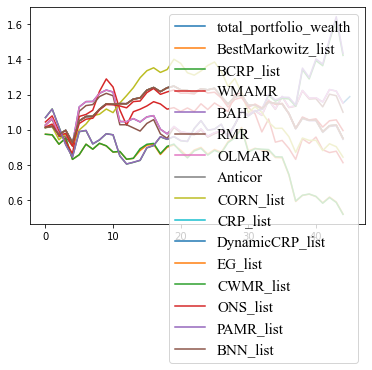

In [204]:
plt.plot(total_portfolio_wealth)
#plt.plot(list(avg(purr)))
plt.plot(BestMarkowitz_list)
plt.plot(BCRP_list)
plt.plot(WMAMR_list)
plt.plot(BAH_list)
plt.plot(RMR_list)
plt.plot(OLMAR_list)
plt.plot(Anticor_list)
plt.plot(CORN_list)
plt.plot(CRP_list)
plt.plot(DynamicCRP_list)
plt.plot(EG_list)
plt.plot(CWMR_list)
plt.plot(ONS_list)
plt.plot(PAMR_list)
plt.plot(BNN_list)
plt.legend(["total_portfolio_wealth","BestMarkowitz_list","BCRP_list","WMAMR","BAH","RMR","OLMAR","Anticor","CORN_list","CRP_list",
           "DynamicCRP_list","EG_list","CWMR_list","ONS_list","PAMR_list","BNN_list"], ncol=1, prop={"family": "Times New Roman", "size": 15})
plt.show()